"""Question 1. Problem statement. Describe the dataset, analyze the target variable, and state your prediction goal."""

 - Problem Statement -
What predicts the severity of Medical Malpractice given Attorney, Marraige status, Insurance or Gender?

 - Dataset -
https://www.kaggle.com/datasets/gabrielsantello/medical-malpractice-insurance-dataset

This appears to be data related to insurance payouts due to medical malpractice.  This is a multi-billion dollar concern. This dataset is compreised of 79210 payment records, no dates are attached.

 - Analyze -

 - Prediction Goal -
I think we are going to see that increases in payout are obviously going to be higher on severity.
I think another factor attorny being private is going to up the severity.
lastly I think people whom are married are going to have more overall claims as they have a close nit support network.
Some unwarnted advice from Warren Buffet - "In HBO’s 2017 documentary, “Becoming Warren Buffett,” the investing legend says the biggest decision of your life will be who you choose to marry."


In [184]:
'''Question 2. Basic data cleaning.  Drop unwanted features.  Address missing values.  Remove Duplicates. 
Check if there are any inconsistent inputs for categorical variables. Transform categorical variables into numeric.
Use boxplots or histogram to identify outliers for numeric variables and remove them.'''
import pandas
import matplotlib.pyplot as plt
import seaborn 
from sklearn.linear_model import LinearRegression

df = pandas.read_csv('medicalmalpractice.csv')

#Drop Duplicates - nothing dropped seems everything is unquie in this data.
df.drop_duplicates( keep='first', inplace=False, ignore_index=False)

#Dropping amount - not used for prediction, extra column, and it would not model well to try to estimate amount.
#also dropping age as it would be difficult to predict, and it is assumed that age does not influence chance of malpractice.
remove_columns = ['Amount','Age'] 
df.drop(remove_columns,inplace=True, axis =1)

#check if missing values
print(df.isnull().sum())
print('\nshape')
print(df.shape)

#no missing values

#check data types
print('\nData types.')
print(df.dtypes)

Severity            0
Private Attorney    0
Marital Status      0
Specialty           0
Insurance           0
Gender              0
dtype: int64

shape
(79210, 6)

Data types.
Severity             int64
Private Attorney     int64
Marital Status       int64
Specialty           object
Insurance           object
Gender              object
dtype: object


In [185]:
#convert data to categorical
Specialty_list = ['Internal Medicine','Neurology/Neurosurgery','Thoracic Surgery','Emergency Medicine',
                  'Family Practice','Physical Medicine','General Surgery','OBGYN','Orthopedic Surgery',
                 'Urological Surgery','Ophthamology','Cardiology','Anesthesiology','Resident', 
                 'Pediatrics','Plastic Surgeon','Dermatology', 'Occupational Medicine','Pathology','Radiology']
Specialty_list_index = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19']

df['Specialty'] = df['Specialty'].replace(Specialty_list,Specialty_list_index,regex =True)

df['Insurance'] = df['Insurance'].str.replace('Private', '0', regex =True)
df['Insurance'] = df['Insurance'].str.replace('Unknown', '1', regex =True)
df['Insurance'] = df['Insurance'].str.replace('Workers Compensation', '2', regex =True)
df['Insurance'] = df['Insurance'].str.replace('Medicare/Medicaid', '3', regex =True)
df['Insurance'] = df['Insurance'].str.replace('No Insurance', '4', regex =True)

df['Gender'] = df['Gender'].str.replace('Male', '0', regex =True)
df['Gender'] = df['Gender'].str.replace('Female', '1', regex =True)



In [186]:
#Corr
print(df.corr())
print('\nFrom this we can see that nothing correlate well.')

                  Severity  Private Attorney  Marital Status  Specialty  \
Severity          1.000000          0.297529       -0.100711  -0.122148   
Private Attorney  0.297529          1.000000       -0.119135  -0.292628   
Marital Status   -0.100711         -0.119135        1.000000   0.042420   
Specialty        -0.122148         -0.292628        0.042420   1.000000   
Insurance        -0.116993         -0.134982        0.042145   0.065058   
Gender           -0.028086         -0.001071       -0.188367   0.053141   

                  Insurance    Gender  
Severity          -0.116993 -0.028086  
Private Attorney  -0.134982 -0.001071  
Marital Status     0.042145 -0.188367  
Specialty          0.065058  0.053141  
Insurance          1.000000  0.128738  
Gender             0.128738  1.000000  

From this we can see that nothing correlate well.


Chart one makes it seem like having a private attorney increases the spread of severity.
Chart two needs some context 0 - Divorced, 1 - single, 2 - married, 3 - widowed, 4 - unknown
This supports my theroy that marriage allows greater freedom to seek compenstation for injury.
Chart three: 0 - private insurance, 1 - Unkown, 2 - Worker Comp, 3 - Medicare/aid, 4 - No Insurance.
from this we can see that Workers comp makes up a small portion.  These could be further complicated with abritation clauses
across all we see a large spike in a severity of 3 and 4. 
chart four has one interesting trend in that the male gender; there are no instances of 1 or 2.
The severity rating of damage to the patient, from 1 (emotional trauma) to 9 (death)
this could be incomplete data or it could be an example of men struggling to describe what they experience.


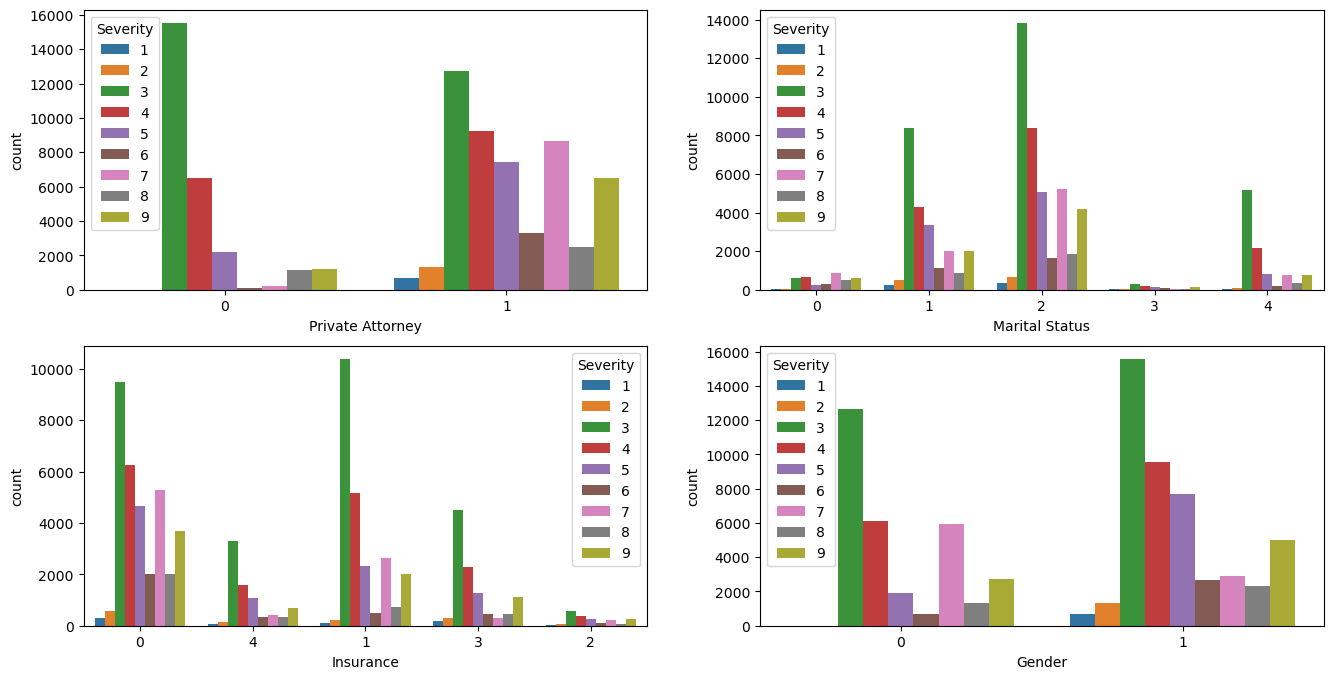

In [187]:
#box plot attempt on numerical data - boxplot only works if there is categorical data.
#print ('\n\n')

cat_list=['Private Attorney','Marital Status','Insurance','Gender']
fig=plt.figure(figsize=(16,8))
for i in range(len(cat_list)):
    column=cat_list[i]
    sub=fig.add_subplot(2,2,i+1)
    chart=sns.countplot(x=column, hue='Severity', data=df)
    
print("Chart one makes it seem like having a private attorney increases the spread of severity.")
print("Chart two needs some context 0 - Divorced, 1 - single, 2 - married, 3 - widowed, 4 - unknown")
print("This supports my theroy that marriage allows greater freedom to seek compenstation for injury.")
print('Chart three: 0 - private insurance, 1 - Unkown, 2 - Worker Comp, 3 - Medicare/aid, 4 - No Insurance.')
print ('from this we can see that Workers comp makes up a small portion.  These could be further complicated with abritation clauses')
print ('across all we see a large spike in a severity of 3 and 4. ')
print ('chart four has one interesting trend in that the male gender; there are no instances of 1 or 2.')
print ('The severity rating of damage to the patient, from 1 (emotional trauma) to 9 (death)')
print('this could be incomplete data or it could be an example of men struggling to describe what they experience.')

In [188]:
'''Question 3. Feature Engineering. 20 points
Feature selection. Use graphs, ANOVA test, Chi-squared test to reduce the dimension. 
Any variables with zero to little variance?  Any features Irrelevant to the target variable? 
Any high-correlated Features?

Feature scaling. Does this algorithm require normalized data or standardized data?
Are there any categorical variables need to be changed to dummy variables?'''

from sklearn.feature_selection import SelectKBest, f_classif, chi2
import numpy
import seaborn as sns

x = df.loc[:, ['Private Attorney','Marital Status','Specialty','Insurance','Gender']]
y = df.loc[:, 'Severity']

#k-best
fs = SelectKBest(score_func=f_classif, k='all')
FeaturesS = fs.fit(x, y)
numpy.set_printoptions(suppress = True)
print ('K-Best')
print(FeaturesS.scores_)     
print(FeaturesS.pvalues_)

print('Based on the F-scores it looks like everything feeds in pretty well to predict the severity.')
print("The Private Attorney and Gender seem to be the largest F-scores.")
print("Based on the p-values Everything seems to have a rather large statistical difference between the groups.")


K-Best
[2146.27654744  174.15627287  236.3994271   259.36144349  895.87563268]
[0. 0. 0. 0. 0.]
Based on the F-scores it looks like everything feeds in pretty well to predict the severity.
The Private Attorney and Gender seem to be the largest F-scores.
Based on the p-values Everything seems to have a rather large statistical difference between the groups.


In [189]:
#chi-square test
chi = SelectKBest(score_func=chi2, k='all')
catFeatures = chi.fit(x, y.astype('int'))
print ('Chi-Square test')
print(catFeatures.scores_)
print(catFeatures.pvalues_)
print("With the Chi Square we see a very similar result. With the exception It makes Specialty and Insurance seem like better predictors.")

Chi-Square test
[4785.75565606  728.2987593  5437.65618509 3262.69774253 2608.95963697]
[0. 0. 0. 0. 0.]
With the Chi Square we see a very similar result. With the exception It makes Specialty and Insurance seem like better predictors.


confusion matrix for model.
[[   0    0  163    0   37    0    0    0    0]
 [   0    0  301    0  101    0    0    0    0]
 [   0    0 7251    0  638    0  586    0    0]
 [   0    0 3788    0  391    0  534    0    0]
 [   0    0 2092    0  552    0  241    0    0]
 [   0    0  598    0  254    0  160    0    0]
 [   0    0 1363    0  410    0  889    0    0]
 [   0    0  694    0   97    0  297    0    0]
 [   0    0 1590    0  303    0  433    0    0]]


,variable,coefficient
0,Private Attorney,6.022055
1,Marital Status,0.121269
2,Specialty,0.005024
3,Insurance,0.090830
4,Gender,6.203217


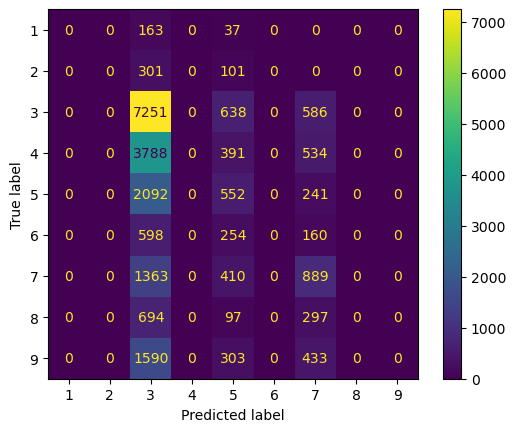

In [190]:
'''Question 4. Build the prediction model. 20 points
Does this data need to be balanced?
Do you use train_test_split or cross validation to validate the result?
Which algorithm is appropriate for this problem?
Which metrics do you use to evaluate the prediction model?'''
from sklearn.model_selection import train_test_split
from sklearn import metrics
#from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score, plot_roc_curve, plot_precision_recall_curve, plot_confusion_matrix
from sklearn.linear_model import LogisticRegression

x = df.loc[:, df.columns!='Severity'] #every column that is not severity may not be wise in this case
y = df['Severity']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0, stratify=y)

LogRegression = LogisticRegression(penalty=None, max_iter=2000)
LogRegression.fit(x_test, y_test.values.ravel())
y_predicted = LogRegression.predict(x_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_predicted)
print ("confusion matrix for model.")
print (cnf_matrix) #confusion matrix 

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(LogRegression, x_test, y_test)


pandas.DataFrame(data={'variable': x_train.columns, 'coefficient': LogRegression.coef_[0]})


In [191]:
'''Question 5. Save the report and upload it to your Github repository. Upload the .ipyn file to MOODLE. 
Please print out the result at each step and verify it. Do not print out the results of multiple steps all at once.
The readability of your report can greatly affect your score. '''



'Question 5. Save the report and upload it to your Github repository. Upload the .ipyn file to MOODLE. \nPlease print out the result at each step and verify it. Do not print out the results of multiple steps all at once.\nThe readability of your report can greatly affect your score. '